In [1]:
# mnist 에서 숫자(손글씨) 데이터 가져옴
from keras.datasets import mnist

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("Train data : {:04d}, Test_data : {:04d}". format(X_train.shape[0], 
                                                      X_test.shape[0]))

Train data : 60000, Test_data : 10000


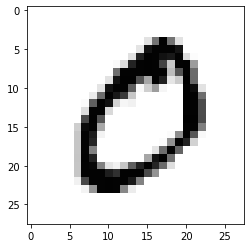

In [2]:
# 처음 자료를 가지고 와서 화면에 출력
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap='Greys')
plt.show()

In [3]:
import sys

# 각 자료에 저장된 값을 화면에 출력
for row in X_train[1]:   # 28 * 28  : 28회 반복
    for col in row:
        sys.stdout.write('%3d' % col)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

In [4]:
print("before : ", X_train.shape, X_test.shape  )
# 2차원으로 변경
# X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.reshape(X_train.shape[0], 
                          X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], 
                        X_test.shape[1] * X_test.shape[2])
print("after : ", X_train.shape, X_test.shape )

before :  (60000, 28, 28) (10000, 28, 28)
after :  (60000, 784) (10000, 784)


In [5]:
# 정규화 : 성능을 좋게 하기 위해서 -> 숫자를 0~1사이의 수로 변경
X_train = X_train.astype(float)/255.0
X_test = X_test.astype(float)/255.0

In [6]:
from keras.utils import np_utils

# 클래스 값을 분류해서 category로 변경
Y_train = np_utils.to_categorical(Y_class_train, 10)  # 10개로 분류
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [7]:
print(Y_train[0], Y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
# 모델 기본 프레임 만들기
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import tensorflow as tf

In [9]:
# 모델 설정
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
# 모델 실행 환경설정
# 모델 저장 폴더 설정
MODEL_DIR = './CNN_model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath= "./" +  MODEL_DIR + "/{epoch:02d}-{val_loss:.4f}.hdf5"

In [11]:
# 모델 컴파일, 실행
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# 모델 최적화 설정
# 체크포인트 설정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test),
                   epochs=200, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15971, saving model to ././CNN_model\01-0.1597.hdf5

Epoch 00002: val_loss improved from 0.15971 to 0.10238, saving model to ././CNN_model\02-0.1024.hdf5

Epoch 00003: val_loss improved from 0.10238 to 0.08406, saving model to ././CNN_model\03-0.0841.hdf5

Epoch 00004: val_loss improved from 0.08406 to 0.07067, saving model to ././CNN_model\04-0.0707.hdf5

Epoch 00005: val_loss improved from 0.07067 to 0.06855, saving model to ././CNN_model\05-0.0686.hdf5

Epoch 00006: val_loss improved from 0.06855 to 0.06651, saving model to ././CNN_model\06-0.0665.hdf5

Epoch 00007: val_loss improved from 0.06651 to 0.05887, saving model to ././CNN_model\07-0.0589.hdf5

Epoch 00008: val_loss improved from 0.05887 to 0.05812, saving model to ././CNN_model\08-0.0581.hdf5

Epoch 00009: val_loss did not improve from 0.05812

Epoch 00010: val_loss did not improve from 0.05812

Epoch 00011: val_loss did not improve from 0.05812

Epoch 00012: val_loss did not i

In [12]:
# 테스트 정확도 출력
print(" Test accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9830
 Test accuracy : 0.9830
